1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import Library

In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

3. Path Dataset

In [ ]:
diabetic_retinopathy = Path('/content/drive/MyDrive/Dataset Machine Learning/diabetic_retinopathy')
glaucoma = Path('/content/drive/MyDrive/Dataset Machine Learning/glaucoma')
cataract = Path('/content/drive/MyDrive/Dataset Machine Learning/cataract')
normal = Path('/content/drive/MyDrive/Dataset Machine Learning/normal')

In [ ]:
for p in [diabetic_retinopathy, glaucoma, cataract, normal]:
    jpg_count = len(list(p.glob('*.jpg')))
    jpeg_count = len(list(p.glob('*.jpeg')))
    png_count = len(list(p.glob('*.png')))
    total = jpg_count + jpeg_count + png_count
    print(f"{p.name}: {total} images (jpg={jpg_count}, jpeg={jpeg_count}, png={png_count})")

diabetic_retinopathy: 1098 images (jpg=0, jpeg=1098, png=0)
glaucoma: 1007 images (jpg=906, jpeg=0, png=101)
cataract: 1038 images (jpg=938, jpeg=0, png=100)
normal: 1074 images (jpg=1074, jpeg=0, png=0)


In [ ]:
disease_type = [diabetic_retinopathy, glaucoma, cataract, normal]
df = pd.DataFrame(columns=['image', 'disease_type'])

# Gunakan tqdm agar ada progress bar
for types in disease_type:
    # Ambil semua file .jpg, .jpeg, dan .png
    image_files = list(types.glob('*.jpg')) + list(types.glob('*.jpeg')) + list(types.glob('*.png'))
    for imagepath in tqdm(image_files, desc=f"Loading {types.name}"):
        df = pd.concat([
            df,
            pd.DataFrame({
                'image': [str(imagepath)],
                'disease_type': [types.name]
            })
        ], ignore_index=True)


Loading normal: 100%|██████████| 1074/1074 [00:00<00:00, 2215.51it/s]


In [ ]:
# display the dataframe
df

,image,disease_type
0,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
1,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
2,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
3,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
4,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy
...,...,...
4212,/content/drive/MyDrive/Dataset Machine Learnin...,normal
4213,/content/drive/MyDrive/Dataset Machine Learnin...,normal
4214,/content/drive/MyDrive/Dataset Machine Learnin...,normal
4215,/content/drive/MyDrive/Dataset Machine Learnin...,normal


In [ ]:
# check the count of the target label
df.disease_type.value_counts()

,count
disease_type,
diabetic_retinopathy,1098
normal,1074
cataract,1038
glaucoma,1007


### Visualizing Images in the dataset

In [ ]:
def plot_image(label_name, num_samples=3):
    """
    Menampilkan beberapa contoh gambar dari kelas penyakit mata tertentu.
    Args:
        label_name (str): nama kelas, misalnya 'glaucoma', 'cataract', 'normal', atau 'diabetic_retinopathy'
        num_samples (int): jumlah gambar yang ingin ditampilkan
    """
    # Pastikan label valid
    valid_labels = ['diabetic_retinopathy', 'glaucoma', 'cataract', 'normal']
    if label_name not in valid_labels:
        print(f"Label tidak valid! Pilih salah satu dari: {valid_labels}")
        return

    # Ambil sample gambar dari DataFrame
    sample_images = df[df['disease_type'] == label_name].sample(num_samples)['image']

    # Plot gambar
    plt.figure(figsize=(12, 6))
    for i, path in enumerate(sample_images, 1):
        img = mpimg.imread(path)
        plt.subplot(1, num_samples, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(label_name.replace("_", " ").title())

    plt.suptitle(f"Contoh Gambar: {label_name.replace('_', ' ').title()}", fontsize=16)
    plt.show()

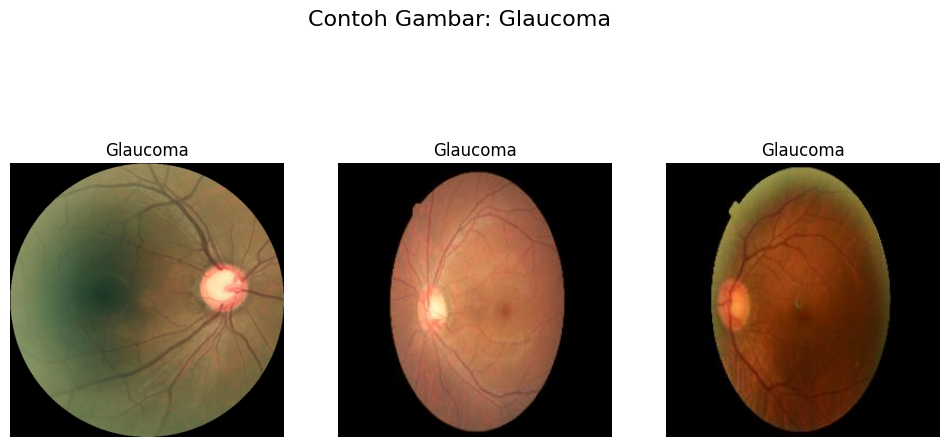

In [ ]:
# Menampilkan 3 contoh gambar dari setiap kelas
plot_image('glaucoma', num_samples=3)

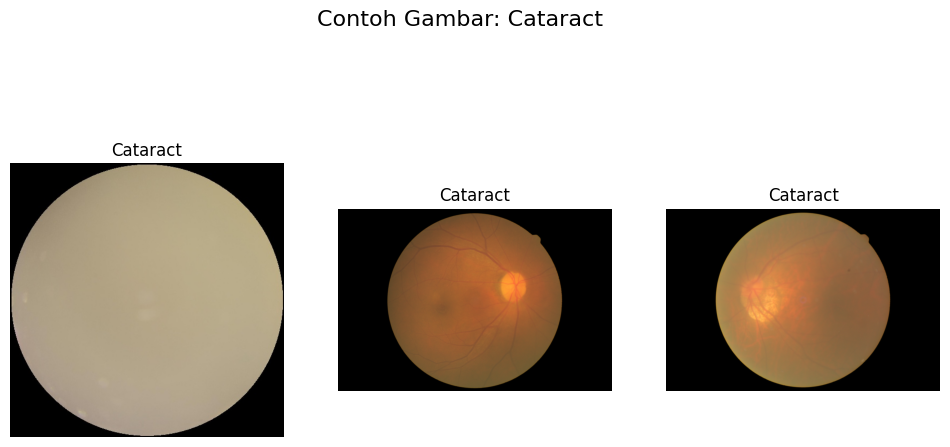

In [ ]:
plot_image('cataract', num_samples=3)

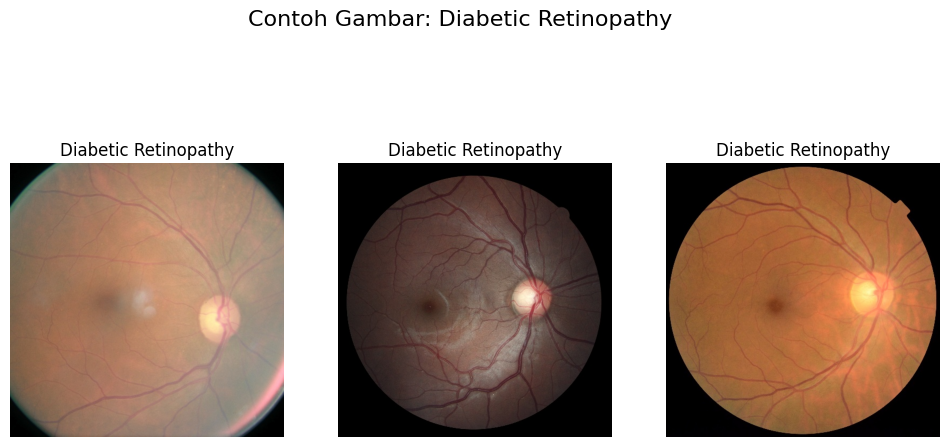

In [ ]:
plot_image('diabetic_retinopathy', num_samples=3)

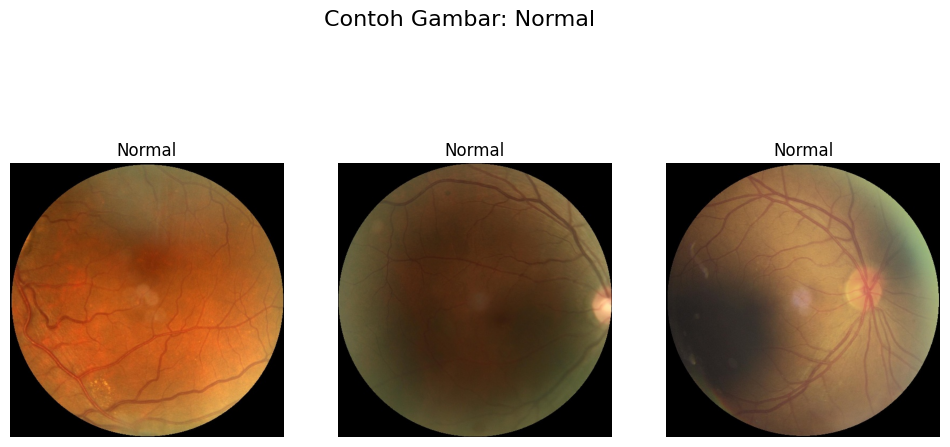

In [ ]:
plot_image('normal', num_samples=3)

In [ ]:
# ============================================
# 10. Mapping Label ke Angka (untuk training model)
# ============================================
label_map = {'normal': 0,
             'cataract': 1,
             'glaucoma': 2,
             'diabetic_retinopathy': 3}

# buat kolom baru berisi label numerik
df['label'] = df['disease_type'].map(label_map)

# cek hasil mapping
df

,image,disease_type,label
0,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
1,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
2,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
3,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
4,/content/drive/MyDrive/Dataset Machine Learnin...,diabetic_retinopathy,3
...,...,...,...
4212,/content/drive/MyDrive/Dataset Machine Learnin...,normal,0
4213,/content/drive/MyDrive/Dataset Machine Learnin...,normal,0
4214,/content/drive/MyDrive/Dataset Machine Learnin...,normal,0
4215,/content/drive/MyDrive/Dataset Machine Learnin...,normal,0


In [ ]:
# check the lebel count to verify it has been mapped
df.disease_type.value_counts()

,count
disease_type,
diabetic_retinopathy,1098
normal,1074
cataract,1038
glaucoma,1007


In [ ]:
# randomising the dataset
df1 = df.sample(frac=1).reset_index(drop=True)

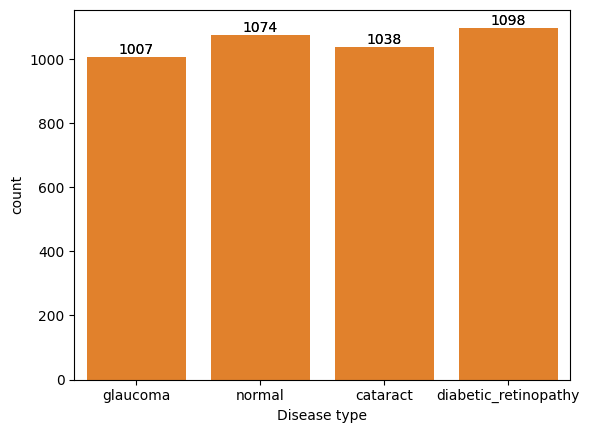

In [ ]:
# create a countplot of the disease type
sns.countplot(x = 'disease_type', data = df1)
plt.xlabel("Disease type")
ax = sns.countplot(x='disease_type', data=df1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
#import necessary libraries for the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

Pendekatan Fitur Klasik GLCM

✅ Total data: 4217 citra
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

🎯 Akurasi Klasifikasi (GLCM + SVM): 77.73%

                      precision    recall  f1-score   support

            cataract       0.81      0.83      0.82       208
diabetic_retinopathy       0.91      0.87      0.89       220
            glaucoma       0.70      0.60      0.65       201
              normal       0.69      0.80      0.74       215

            accuracy                           0.78       844
           macro avg       0.78      0.77      0.77       844
        weighted avg       0.78      0.78      0.78       844



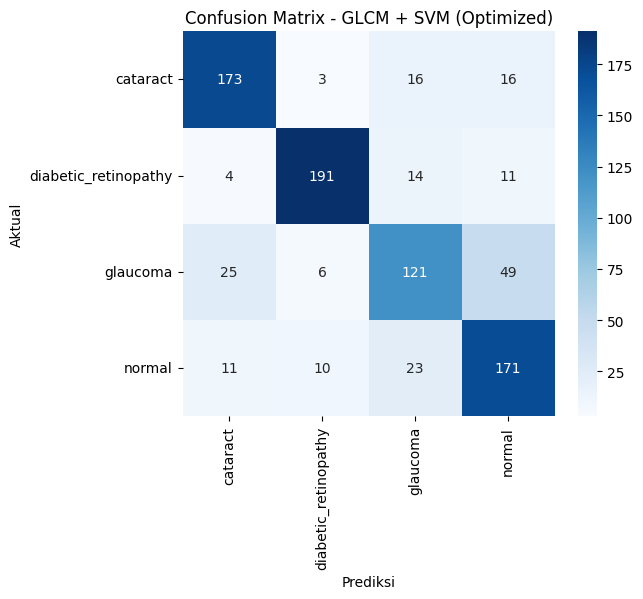

In [ ]:
from pathlib import Path
import cv2, os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import seaborn as sns

# Path dataset
dataset_base = Path('/content/drive/MyDrive/Dataset Machine Learning')
categories = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Ekstraksi fitur GLCM (multi-angle)
def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))
    glcm = graycomatrix(gray, distances=[1, 3, 5],
                        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                        symmetric=True, normed=True)
    feats = [
        graycoprops(glcm, 'contrast').mean(),
        graycoprops(glcm, 'dissimilarity').mean(),
        graycoprops(glcm, 'homogeneity').mean(),
        graycoprops(glcm, 'energy').mean(),
        graycoprops(glcm, 'correlation').mean(),
        graycoprops(glcm, 'ASM').mean()
    ]
    return feats

# Load semua gambar
X, y = [], []
for label in categories:
    folder = dataset_base / label
    for file in os.listdir(folder):
        img_path = folder / file
        img = cv2.imread(str(img_path))
        if img is None:
            continue
        X.append(extract_glcm_features(img))
        y.append(label)

X = np.array(X)
y = np.array(y)
print(f"✅ Total data: {len(X)} citra")

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Optimasi SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=3)
grid.fit(X_train, y_train)

print(f"Best Params: {grid.best_params_}")

# Evaluasi
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Klasifikasi (GLCM + SVM): {acc*100:.2f}%\n")
print(classification_report(y_test, y_pred, target_names=categories))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=categories)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - GLCM + SVM (Optimized)")
plt.show()


Pendekatan Fitur Klasik: LBP + SVM

✅ Total data berhasil diekstraksi: 4217 citra

🎯 Akurasi Klasifikasi (LBP + SVM): 80.45%

📊 Laporan Klasifikasi:
                      precision    recall  f1-score   support

            cataract       0.79      0.85      0.82       208
diabetic_retinopathy       0.97      0.88      0.92       220
            glaucoma       0.74      0.62      0.67       201
              normal       0.73      0.86      0.79       215

            accuracy                           0.80       844
           macro avg       0.81      0.80      0.80       844
        weighted avg       0.81      0.80      0.80       844



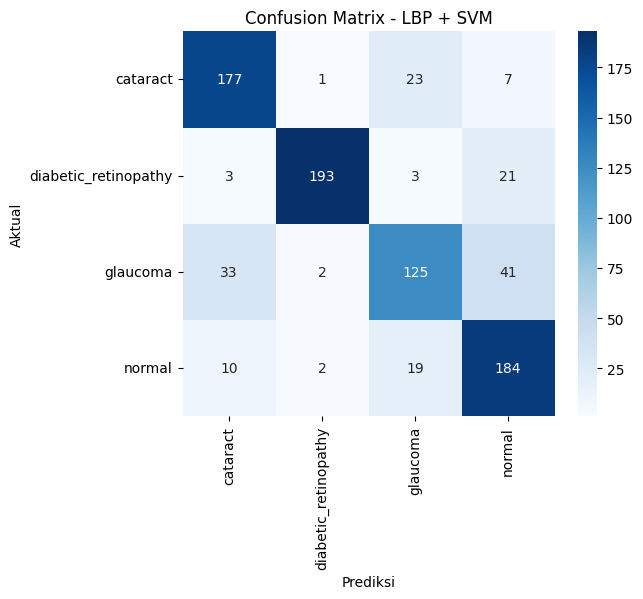

In [ ]:

from pathlib import Path
import cv2
import numpy as np
import os
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Path ke dataset ----
dataset_base = Path('/content/drive/MyDrive/Dataset Machine Learning')
categories = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# ---- Parameter LBP ----
radius = 3            # radius tetangga
n_points = 8 * radius  # jumlah titik di sekitar piksel
method = 'uniform'    # metode LBP (uniform paling umum)

# ---- Fungsi ekstraksi fitur LBP ----
def extract_lbp_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))
    lbp = local_binary_pattern(gray, n_points, radius, method)
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, n_points + 3),
                             range=(0, n_points + 2))
    # Normalisasi histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

# ---- Ekstraksi fitur dari seluruh gambar ----
X = []
y = []

for label in categories:
    folder = dataset_base / label
    if not folder.exists():
        print(f"⚠️ Folder tidak ditemukan: {folder}")
        continue

    for file in os.listdir(folder):
        img_path = folder / file
        img = cv2.imread(str(img_path))
        if img is None:
            continue

        features = extract_lbp_features(img)
        X.append(features)
        y.append(label)

X = np.array(X)
y = np.array(y)
print(f"✅ Total data berhasil diekstraksi: {len(X)} citra")

# ---- Normalisasi fitur ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Split data menjadi train/test ----
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# ---- Latih model SVM ----
svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# ---- Evaluasi hasil ----
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Klasifikasi (LBP + SVM): {acc*100:.2f}%\n")
print("📊 Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=categories))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred, labels=categories)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - LBP + SVM")
plt.show()


Transfer Learning: ResNet50

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.
Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 926s 9s/step - accuracy: 0.2505 - loss: 1.6861 - val_accuracy: 0.2461 - val_loss: 1.4310
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 872s 8s/step - accuracy: 0.2533 - loss: 1.4427 - val_accuracy: 0.2461 - val_loss: 1.3989
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 877s 8s/step - accuracy: 0.2678 - loss: 1.4183 - val_accuracy: 0.2461 - val_loss: 1.3902
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 861s 8s/step - accuracy: 0.2767 - loss: 1.3947 - val_accuracy: 0.2461 - val_loss: 1.3812
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 889s 8s/step - accuracy: 0.2653 - loss: 1.4042 - val_accuracy: 0.2461 - val_loss: 1.3771
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 897s 9s/step - accuracy: 0.2901 - loss: 1.3869 - val_accuracy: 0.2461 - val_loss: 1.3856
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 872s 8s/step - accuracy: 0.3048 - loss: 1.3806 - val_accuracy: 0.2461 - val_loss: 1.3702
Epoch 8/10
106

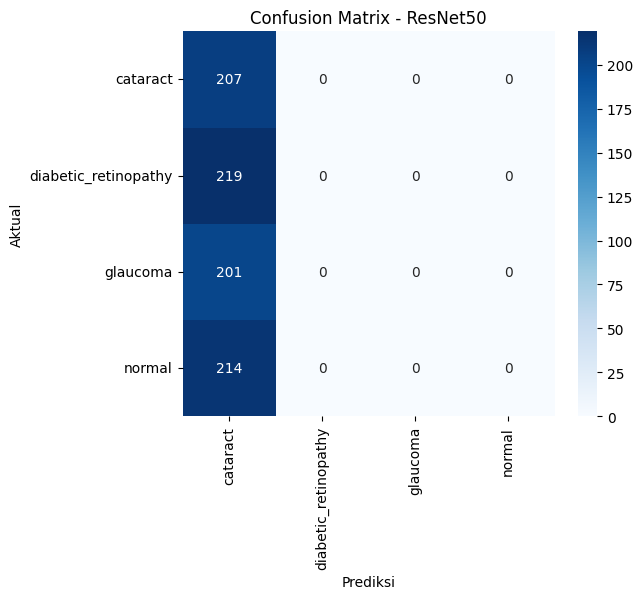


📊 Laporan Klasifikasi:
                      precision    recall  f1-score   support

            cataract       0.25      1.00      0.40       207
diabetic_retinopathy       0.00      0.00      0.00       219
            glaucoma       0.00      0.00      0.00       201
              normal       0.00      0.00      0.00       214

            accuracy                           0.25       841
           macro avg       0.06      0.25      0.10       841
        weighted avg       0.06      0.25      0.10       841



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ---- Path dataset ----
dataset_base = Path('/content/drive/MyDrive/Dataset Machine Learning')

# ---- Data generator ----
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(dataset_base, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
val_data = datagen.flow_from_directory(dataset_base, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

# ---- Load model ----
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# ---- Klasifikasi head ----
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# ---- Kompilasi & training ----
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, validation_data=val_data, epochs=10, verbose=1)

# ---- Evaluasi ----
val_loss, val_acc = model.evaluate(val_data)
print(f"\n🎯 Akurasi Validasi (ResNet50): {val_acc*100:.2f}%")

# ---- Confusion matrix ----
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_data.classes, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - ResNet50")
plt.show()

print("\n📊 Laporan Klasifikasi:")
print(classification_report(val_data.classes, y_pred, target_names=val_data.class_indices.keys()))


Pendekatan Deep Learning: CNN

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1323s 12s/step - accuracy: 0.4025 - loss: 8.3195 - val_accuracy: 0.2604 - val_loss: 11.6925
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.4491 - loss: 1.2338 - val_accuracy: 0.2604 - val_loss: 7.5248
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.4704 - loss: 1.1369 - val_accuracy: 0.3686 - val_loss: 2.0993
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.4770 - loss: 1.1170 - val_accuracy: 0.4304 - val_loss: 1.4064
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.4844 - loss: 1.1736 - val_accuracy: 0.3948 - val_loss: 1.4770
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.4565 - loss: 1.1780 - val_accuracy: 0.3769 - val_loss: 1.3109
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.4431 - loss: 1.1469 - val_accuracy: 0.3960 - val_loss: 1.2486
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.4455 - loss: 1.1366 - val_a

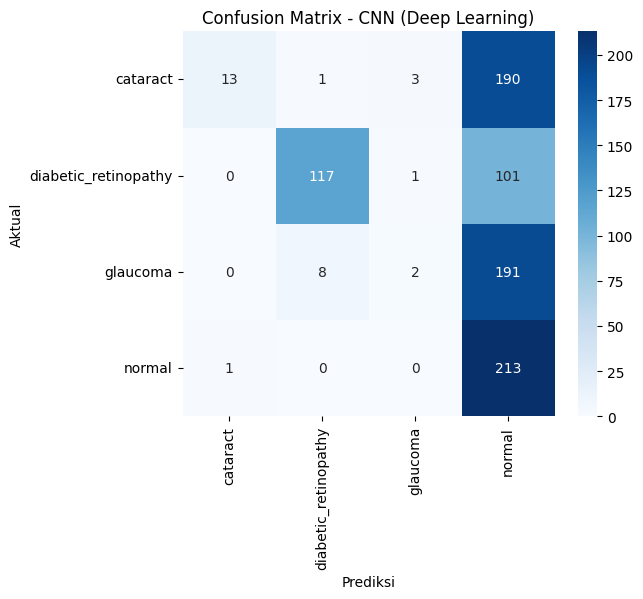

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# ---- Path dataset ----
base_dir = '/content/drive/MyDrive/Dataset Machine Learning'

# Pastikan dataset punya subfolder:
# Cataract / Diabetic_Retinopathy / Glaucoma / Normal

# ---- Augmentasi dan preprocessing data ----
datagen = ImageDataGenerator(
    rescale=1./255,           # normalisasi piksel
    validation_split=0.2,     # 80% train, 20% validation
    rotation_range=15,        # augmentasi rotasi
    zoom_range=0.1,           # zoom kecil
    horizontal_flip=True,     # flip kiri-kanan
)

# ---- Data training ----
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# ---- Data validasi ----
valid_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ---- Model CNN ----
model = Sequential([
    # Blok 1
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Blok 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Blok 3
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten dan Fully Connected Layer
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 kelas output
])

# ---- Kompilasi model ----
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ---- Training model ----
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=20
)

# ---- Evaluasi model ----
loss, acc = model.evaluate(valid_data)
print(f"\n🎯 Akurasi Validasi: {acc*100:.2f}%")

# ---- Prediksi data validasi ----
y_pred = model.predict(valid_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = valid_data.classes
labels = list(valid_data.class_indices.keys())

# ---- Laporan klasifikasi ----
print("\n📊 Laporan Klasifikasi:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - CNN (Deep Learning)")
plt.show()


MobileViT

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

Dataset: total=4217, train=3373, test=844
Device: cpu  |  FP16 enabled: False


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

Classifier replaced: True | model.config.num_labels=4

=== Start training ===



Epoch 1/10:   0%|                                                           | 0/211 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/22.4M [00:00<?, ?B/s]

Epoch 1/10: 100%|██████████████████████████████| 211/211 [45:55<00:00, 13.06s/it, train_loss=1.1733]


Epoch 1 -> val_loss: 0.8846 | val_acc: 0.7547
💾 New best model saved to /content/best_mobilevit_state_dict.pth


Epoch 2/10: 100%|██████████████████████████████| 211/211 [45:26<00:00, 12.92s/it, train_loss=0.7595]


Epoch 2 -> val_loss: 0.5380 | val_acc: 0.8341
💾 New best model saved to /content/best_mobilevit_state_dict.pth


Epoch 3/10: 100%|██████████████████████████████| 211/211 [45:43<00:00, 13.00s/it, train_loss=0.5361]


Epoch 3 -> val_loss: 0.3829 | val_acc: 0.8780
💾 New best model saved to /content/best_mobilevit_state_dict.pth


Epoch 4/10: 100%|██████████████████████████████| 211/211 [45:57<00:00, 13.07s/it, train_loss=0.4167]


Epoch 4 -> val_loss: 0.2900 | val_acc: 0.9040
💾 New best model saved to /content/best_mobilevit_state_dict.pth


Epoch 5/10: 100%|██████████████████████████████| 211/211 [45:44<00:00, 13.01s/it, train_loss=0.3642]


Epoch 5 -> val_loss: 0.2496 | val_acc: 0.9194
💾 New best model saved to /content/best_mobilevit_state_dict.pth


Epoch 6/10: 100%|██████████████████████████████| 211/211 [45:50<00:00, 13.04s/it, train_loss=0.2871]


Epoch 6 -> val_loss: 0.2410 | val_acc: 0.9194
💾 New best model saved to /content/best_mobilevit_state_dict.pth


Epoch 7/10: 100%|██████████████████████████████| 211/211 [45:59<00:00, 13.08s/it, train_loss=0.2766]


Epoch 7 -> val_loss: 0.2315 | val_acc: 0.9206
💾 New best model saved to /content/best_mobilevit_state_dict.pth


Epoch 8/10: 100%|██████████████████████████████| 211/211 [46:12<00:00, 13.14s/it, train_loss=0.2328]


Epoch 8 -> val_loss: 0.2099 | val_acc: 0.9289
💾 New best model saved to /content/best_mobilevit_state_dict.pth


Epoch 9/10: 100%|██████████████████████████████| 211/211 [46:18<00:00, 13.17s/it, train_loss=0.2221]


Epoch 9 -> val_loss: 0.2079 | val_acc: 0.9194
💾 New best model saved to /content/best_mobilevit_state_dict.pth


Epoch 10/10: 100%|█████████████████████████████| 211/211 [46:10<00:00, 13.13s/it, train_loss=0.1940]


Epoch 10 -> val_loss: 0.2032 | val_acc: 0.9265
💾 New best model saved to /content/best_mobilevit_state_dict.pth

=== Final evaluation (load best model) ===

Final -> val_loss: 0.2032 | val_acc: 0.9265

Classification Report:

                      precision    recall  f1-score   support

            cataract       0.92      0.97      0.94       208
diabetic_retinopathy       1.00      1.00      1.00       220
            glaucoma       0.91      0.84      0.88       201
              normal       0.88      0.90      0.89       215

            accuracy                           0.93       844
           macro avg       0.93      0.93      0.92       844
        weighted avg       0.93      0.93      0.93       844



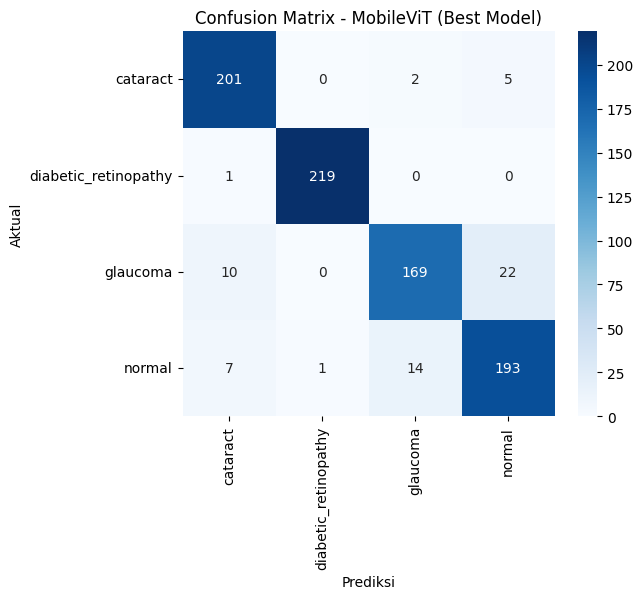

Done.


In [ ]:
# MobileViT - Final Full Code
# Features: robust classifier replace, FP16 toggle, GradScaler if CUDA, early stopping, save best model
# Run in Google Colab (mount Drive) or local environment with dataset path adjusted.

!pip install -q transformers datasets tqdm

from pathlib import Path
import os, cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from transformers import MobileViTForImageClassification, MobileViTImageProcessor

# ---------------------------
# 1) CONFIG
# ---------------------------
DATASET_BASE = Path('/content/drive/MyDrive/Dataset Machine Learning')  # <-- sesuaikan jika perlu
CATEGORIES = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
LABEL_MAP = {c: i for i, c in enumerate(CATEGORIES)}
NUM_LABELS = len(CATEGORIES)

BATCH_SIZE = 16
EPOCHS = 10
LR = 2e-5
PATIENCE = 3
SAVE_PATH = "/content/best_mobilevit_state_dict.pth"
SEED = 42

# reproducibility
torch.manual_seed(SEED)
np.random.seed(SEED)

# ---------------------------
# 2) Processor dan Dataset
# ---------------------------
processor = MobileViTImageProcessor.from_pretrained("apple/mobilevit-small")

class RetinaDataset(Dataset):
    def __init__(self, image_paths, labels, processor):
        self.image_paths = image_paths
        self.labels = labels
        self.processor = processor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        p = str(self.image_paths[idx])
        img = cv2.imread(p)
        if img is None:
            # jika file rusak, buat image hitam kecil untuk mencegah crash
            img = np.zeros((224,224,3), dtype=np.uint8)
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # processor will handle resizing / normalization -> returns dict of tensors
        inputs = self.processor(images=img, return_tensors="pt")
        item = {k: v.squeeze(0) for k, v in inputs.items()}  # remove batch dim
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# ---------------------------
# 3) Load file paths + split
# ---------------------------
image_paths = []
labels = []

for cls in CATEGORIES:
    folder = DATASET_BASE / cls
    if not folder.exists():
        print(f"Warning: folder not found {folder}")
        continue
    for fname in os.listdir(folder):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(folder / fname)
            labels.append(LABEL_MAP[cls])

if len(image_paths) == 0:
    raise RuntimeError(f"No images found under {DATASET_BASE}. Check the path and folder names.")

train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=SEED)

train_dataset = RetinaDataset(train_paths, train_labels, processor)
test_dataset = RetinaDataset(test_paths, test_labels, processor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=torch.cuda.is_available())
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=torch.cuda.is_available())

print(f"Dataset: total={len(image_paths)}, train={len(train_paths)}, test={len(test_paths)}")

# ---------------------------
# 4) Device + FP16 setup
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_fp16 = torch.cuda.is_available()

if use_fp16:
    from torch.cuda.amp import GradScaler, autocast
    scaler = GradScaler()
else:
    # provide a null context manager to use in "with" statements
    from contextlib import nullcontext
    autocast = nullcontext
    scaler = None

print(f"Device: {device}  |  FP16 enabled: {use_fp16}")

# ---------------------------
# 5) Load pretrained MobileViT + robust replace classifier
# ---------------------------
model = MobileViTForImageClassification.from_pretrained("apple/mobilevit-small", ignore_mismatched_sizes=True)

# Try replace various possible classifier heads robustly
def replace_classifier(m, num_labels):
    replaced = False
    if hasattr(m, "classifier"):
        clf = m.classifier
        # common variants
        if hasattr(clf, "in_features"):
            m.classifier = torch.nn.Linear(clf.in_features, num_labels)
            replaced = True
        elif hasattr(clf, "fc"):
            in_f = getattr(clf.fc, "in_features", None) or getattr(clf.fc, "weight", None).shape[1]
            clf.fc = torch.nn.Linear(in_f, num_labels)
            replaced = True
        elif hasattr(clf, "classifier"):
            in_f = getattr(clf.classifier, "in_features", None) or getattr(clf.classifier, "weight", None).shape[1]
            clf.classifier = torch.nn.Linear(in_f, num_labels)
            replaced = True
        else:
            # fallback: try to infer from existing weights
            try:
                w = getattr(clf, "weight")
                in_f = w.shape[1]
                m.classifier = torch.nn.Linear(in_f, num_labels)
                replaced = True
            except Exception:
                replaced = False
    # if not replaced, try to find any Linear in named_modules named 'head' or 'head.fc' etc.
    if not replaced:
        for name, module in m.named_modules():
            if isinstance(module, torch.nn.Linear):
                # replace the first linear with correct out features (risky) - do not do unless necessary
                # skip as conservative approach
                pass
    return replaced

replaced_ok = replace_classifier(model, NUM_LABELS)
# Ensure config updated
model.config.num_labels = NUM_LABELS
model.config.id2label = {i: name for i, name in enumerate(CATEGORIES)}
model.config.label2id = {name: i for i, name in enumerate(CATEGORIES)}

model = model.to(device)
print(f"Classifier replaced: {replaced_ok} | model.config.num_labels={model.config.num_labels}")

optimizer = AdamW(model.parameters(), lr=LR)

# ---------------------------
# 6) Helper: validation function
# ---------------------------
def validate(model, dataloader, device, use_fp16, autocast):
    model.eval()
    total_loss = 0.0
    preds = []
    trues = []
    n_batches = 0

    with torch.no_grad():
        for batch in dataloader:
            # move tensors to device
            batch = {k: v.to(device) for k, v in batch.items()}
            with autocast():
                outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits

            total_loss += loss.item()
            n_batches += 1

            predicted = torch.argmax(logits, dim=1).cpu().numpy()
            preds.extend(predicted)
            trues.extend(batch["labels"].cpu().numpy())

    avg_loss = total_loss / max(1, n_batches)
    acc = accuracy_score(trues, preds) if len(preds)>0 else 0.0
    return avg_loss, acc, trues, preds

# ---------------------------
# 7) Training loop (FP16-aware + early stopping + save best)
# ---------------------------
best_val_loss = float('inf')
no_improve = 0

print("\n=== Start training ===\n")
for epoch in range(1, EPOCHS+1):
    model.train()
    total_train_loss = 0.0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS}", ncols=100)

    for batch in pbar:
        batch = {k: v.to(device) for k, v in batch.items()}

        optimizer.zero_grad()

        if use_fp16:
            with autocast():
                outputs = model(**batch)
                loss = outputs.loss
            # backward with scaler
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            outputs = model(**batch)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

        total_train_loss += loss.item()
        pbar.set_postfix({'train_loss': f"{(total_train_loss / (pbar.n + 1)):.4f}"})

    # validate
    val_loss, val_acc, y_true, y_pred = validate(model, test_loader, device, use_fp16, autocast)
    print(f"Epoch {epoch} -> val_loss: {val_loss:.4f} | val_acc: {val_acc:.4f}")

    # save best model (state_dict)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve = 0
        torch.save(model.state_dict(), SAVE_PATH)
        print(f"💾 New best model saved to {SAVE_PATH}")
    else:
        no_improve += 1
        print(f"⏸ No improvement ({no_improve}/{PATIENCE})")

    if no_improve >= PATIENCE:
        print("⚠️ Early stopping triggered")
        break

# ---------------------------
# 8) Load best model + final evaluation
# ---------------------------
print("\n=== Final evaluation (load best model) ===\n")
model.load_state_dict(torch.load(SAVE_PATH, map_location=device))
model = model.to(device)
model.eval()

val_loss, val_acc, y_true, y_pred = validate(model, test_loader, device, use_fp16, autocast)
print(f"Final -> val_loss: {val_loss:.4f} | val_acc: {val_acc:.4f}\n")
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=CATEGORIES))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - MobileViT (Best Model)")
plt.show()

print("Done.")
